In [47]:
import sys
sys.path.append("../")
from mir.common.parser import *
from mir.common.repertoire import Repertoire, RepertoireDataset
from mir.basic.segment_usage import *
import time

In [20]:
from sklearn.manifold import TSNE

In [46]:
import importlib
imported_module = importlib.import_module("mir.basic.segment_usage")
importlib.reload(imported_module)

<module 'mir.basic.segment_usage' from '/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py'>

In [3]:
metadata = pd.read_csv('assets/samples/fmba_healthy/metadata.csv')
metadata

,sequencingDate,folder,R1,R2,name,COVID_status,projectName,COVID_IgG,COVID_IgM,COVID_PCR,...,HLA-DQB1.2,HLA-DRB1.1,HLA-DRB1.2,id,subsequent_sequencing,HLA-DRB4.1,HLA-DRB3.1,HLA-DRB5.1,gene,run
0,2020 10 19,2020/10_FMBA_NovaSeq6,770101520808_S102_L002_R1_001.fastq.gz,770101520808_S102_L002_R2_001.fastq.gz,770101520808,healthy,FMBA_DNA,no,no,negative,...,DQB1*06:02,DRB1*11:04,DRB1*15:01,770101520,NaN,NaN,NaN,NaN,NaN,770101520808_S102_L002.clonotypes.TRB.txt
1,2020 10 19,2020/10_FMBA_NovaSeq6,500001210807_S66_L001_R1_001.fastq.gz,500001210807_S66_L001_R2_001.fastq.gz,500001210807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500001210,NaN,NaN,NaN,NaN,NaN,500001210807_S66_L001.clonotypes.TRB.txt
2,2020 10 19,2020/10_FMBA_NovaSeq6,500002190807_S8_L001_R1_001.fastq.gz,500002190807_S8_L001_R2_001.fastq.gz,500002190807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500002190,NaN,NaN,NaN,NaN,NaN,500002190807_S8_L001.clonotypes.TRB.txt
3,2020 10 19,2020/10_FMBA_NovaSeq4,780003510808_S92_L001_R1_001.fastq.gz,780003510808_S92_L001_R2_001.fastq.gz,780003510808,healthy,FMBA_DNA,no,no,negative,...,DQB1*03:03,DRB1*07:01,DRB1*07:01,780003510,NaN,NaN,NaN,NaN,NaN,780003510808_S92_L001.clonotypes.TRB.txt
4,2020 10 19,2020/10_FMBA_NovaSeq4,550001610808_S148_L002_R1_001.fastq.gz,550001610808_S148_L002_R2_001.fastq.gz,550001610808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*11:04,550001610,NaN,NaN,NaN,NaN,NaN,550001610808_S148_L002.clonotypes.TRB.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020 10 19,2020/10_FMBA_NovaSeq5,270000140808_S174_L002_R1_001.fastq.gz,270000140808_S174_L002_R2_001.fastq.gz,270000140808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:02,DRB1*16:01,DRB1*16:01,270000140,NaN,NaN,NaN,NaN,NaN,270000140808_S174_L002.clonotypes.TRB.txt
96,2020 10 19,2020/10_FMBA_NovaSeq5,500001400808_S155_L002_R1_001.fastq.gz,500001400808_S155_L002_R2_001.fastq.gz,500001400808,healthy,FMBA_DNA,no,no,negative,...,DQB1*06:01,DRB1*07:01,DRB1*15:02,500001400,NaN,NaN,NaN,NaN,NaN,500001400808_S155_L002.clonotypes.TRB.txt
97,2020 10 19,2020/10_FMBA_NovaSeq6,780004000807_S5_L001_R1_001.fastq.gz,780004000807_S5_L001_R2_001.fastq.gz,780004000807,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*04:01,780004000,NaN,NaN,NaN,NaN,NaN,780004000807_S5_L001.clonotypes.TRB.txt
98,2020 10 19,2020/10_FMBA_NovaSeq4,550001850808_S122_L002_R1_001.fastq.gz,550001850808_S122_L002_R2_001.fastq.gz,550001850808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*04:01,550001850,NaN,NaN,NaN,NaN,NaN,550001850808_S122_L002.clonotypes.TRB.txt


In [4]:
t0 = time.time()
dataset = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata,
                                 threads=28,
                                 paths=['assets/samples/fmba_healthy/' + r['run'] 
                                        for _, r in metadata.iterrows()])
print(time.time() - t0)


60.03460192680359


In [5]:
dataset.evaluate_segment_usage()

,TRBV7-6*01,TRBV20-1*01,TRBV9*01,TRBJ2-5*01,TRBV7-4*01,TRBV10-2*01,TRBV5-8*01,TRBV7-7*01,TRBV12-2*01,TRBV7-5*01,...,TRBV14*01,TRBV16*01,TRBJ1-3*01,TRBV2*01,TRBV7-9*01,TRBV5-3*01,TRBV6-4*01,TRBV10-3*01,TRBV6-3*01,TRBV5-6*01
0,259,1960,915,1959,33,60,165,94,50,36,...,298,0,999,825,717,63,257,355,1,410
1,94,545,252,738,13,16,40,27,9,2,...,122,0,255,171,234,16,91,116,0,127
2,166,918,350,1100,22,52,79,47,25,13,...,147,0,329,397,424,28,152,190,1,174
3,32,273,115,349,10,15,25,19,8,3,...,71,0,120,114,149,17,30,51,0,51
4,242,1817,953,2042,31,109,125,114,71,29,...,250,0,808,837,787,61,270,383,0,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,347,2047,859,2600,42,205,152,119,69,18,...,374,0,908,1007,1031,93,322,418,1,529
96,60,430,161,578,16,34,28,21,13,7,...,88,0,154,239,200,18,101,90,0,85
97,90,668,349,245,16,51,66,27,21,6,...,135,0,453,232,355,29,102,188,0,214
98,118,944,448,1077,18,71,51,52,29,18,...,138,1,382,279,398,37,271,180,1,158


In [6]:
folder_to_run_mapping = {}
for folder in dataset.metadata[['run', 'folder']].folder.unique():
    folder_to_run_mapping[folder] = set(dataset.metadata[dataset.metadata.folder == folder].run)

In [48]:
log_exp_usage_table = StandardizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V', group_mapping=folder_to_run_mapping, standardization_method='log_exp')
z_score_usage_table = StandardizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V', group_mapping=folder_to_run_mapping, standardization_method='z_score')
norm_usage_table = NormalizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V')


In [49]:
norm_usage_table.segment_usage_matrix

,TRBV7-6*01,TRBV20-1*01,TRBV9*01,TRBV7-4*01,TRBV10-2*01,TRBV5-8*01,TRBV7-7*01,TRBV12-2*01,TRBV7-5*01,TRBV11-1*01,...,TRBV5-5*01,TRBV14*01,TRBV16*01,TRBV2*01,TRBV7-9*01,TRBV5-3*01,TRBV6-4*01,TRBV10-3*01,TRBV6-3*01,TRBV5-6*01
0,0.011185,0.084640,0.039513,0.001425,0.002591,0.007125,0.004059,0.002159,0.001555,0.004448,...,0.009716,0.012869,0.000000,0.035626,0.030963,0.002721,0.011098,0.015330,0.000043,0.017705
1,0.012780,0.074099,0.034262,0.001768,0.002175,0.005438,0.003671,0.001224,0.000272,0.004215,...,0.008294,0.016587,0.000000,0.023249,0.031815,0.002175,0.012373,0.015772,0.000000,0.017267
2,0.015084,0.083417,0.031804,0.001999,0.004725,0.007179,0.004271,0.002272,0.001181,0.003998,...,0.009632,0.013358,0.000000,0.036075,0.038528,0.002544,0.013812,0.017265,0.000091,0.015811
3,0.008779,0.074897,0.031550,0.002743,0.004115,0.006859,0.005213,0.002195,0.000823,0.002195,...,0.009053,0.019479,0.000000,0.031276,0.040878,0.004664,0.008230,0.013992,0.000000,0.013992
4,0.010852,0.081476,0.042734,0.001390,0.004888,0.005605,0.005112,0.003184,0.001300,0.004350,...,0.010986,0.011210,0.000000,0.037532,0.035290,0.002735,0.012107,0.017174,0.000000,0.018116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.013383,0.078949,0.033130,0.001620,0.007907,0.005862,0.004590,0.002661,0.000694,0.003548,...,0.011031,0.014425,0.000000,0.038838,0.039764,0.003587,0.012419,0.016122,0.000039,0.020403
96,0.011510,0.082486,0.030884,0.003069,0.006522,0.005371,0.004028,0.002494,0.001343,0.003261,...,0.010934,0.016881,0.000000,0.045847,0.038366,0.003453,0.019375,0.017265,0.000000,0.016305
97,0.009098,0.067529,0.035281,0.001617,0.005156,0.006672,0.002729,0.002123,0.000607,0.001516,...,0.010210,0.013647,0.000000,0.023453,0.035888,0.002932,0.010311,0.019005,0.000000,0.021634
98,0.009976,0.079811,0.037876,0.001522,0.006003,0.004312,0.004396,0.002452,0.001522,0.003044,...,0.008201,0.011667,0.000085,0.023588,0.033649,0.003128,0.022912,0.015218,0.000085,0.013358


In [50]:
dataset.segment_usage_matrix

,TRBV7-6*01,TRBV20-1*01,TRBV9*01,TRBJ2-5*01,TRBV7-4*01,TRBV10-2*01,TRBV5-8*01,TRBV7-7*01,TRBV12-2*01,TRBV7-5*01,...,TRBV14*01,TRBV16*01,TRBJ1-3*01,TRBV2*01,TRBV7-9*01,TRBV5-3*01,TRBV6-4*01,TRBV10-3*01,TRBV6-3*01,TRBV5-6*01
0,259,1960,915,1959,33,60,165,94,50,36,...,298,0,999,825,717,63,257,355,1,410
1,94,545,252,738,13,16,40,27,9,2,...,122,0,255,171,234,16,91,116,0,127
2,166,918,350,1100,22,52,79,47,25,13,...,147,0,329,397,424,28,152,190,1,174
3,32,273,115,349,10,15,25,19,8,3,...,71,0,120,114,149,17,30,51,0,51
4,242,1817,953,2042,31,109,125,114,71,29,...,250,0,808,837,787,61,270,383,0,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,347,2047,859,2600,42,205,152,119,69,18,...,374,0,908,1007,1031,93,322,418,1,529
96,60,430,161,578,16,34,28,21,13,7,...,88,0,154,239,200,18,101,90,0,85
97,90,668,349,245,16,51,66,27,21,6,...,135,0,453,232,355,29,102,188,0,214
98,118,944,448,1077,18,71,51,52,29,18,...,138,1,382,279,398,37,271,180,1,158


here
res


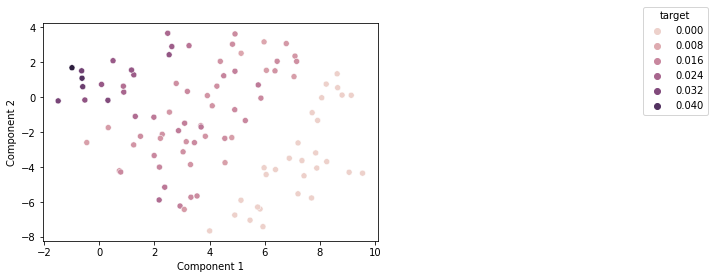

In [51]:
norm_usage_table.plot_pca_results_colored_by(target=norm_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

here
res


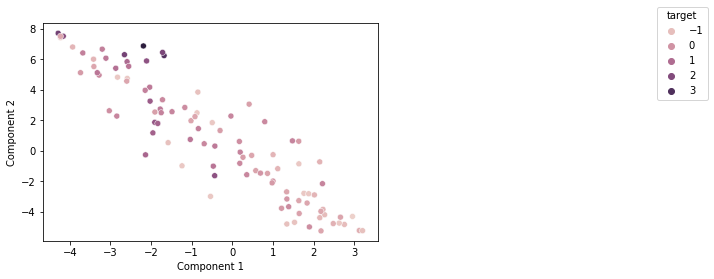

In [53]:
z_score_usage_table.plot_pca_results_colored_by(target=z_score_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

here
res


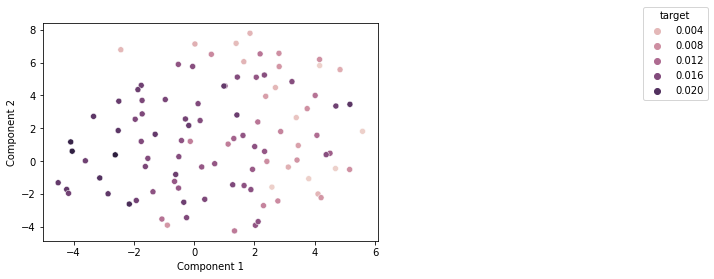

In [38]:
log_exp_usage_table.plot_pca_results_colored_by(target=log_exp_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


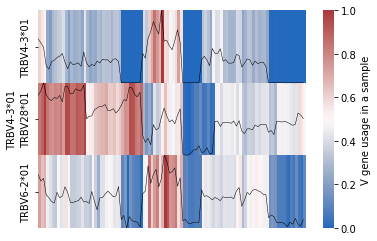

In [52]:
norm_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


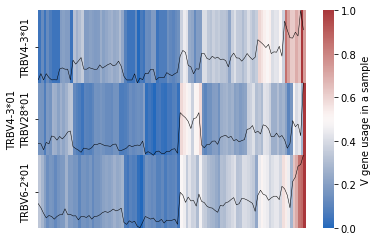

In [54]:
z_score_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


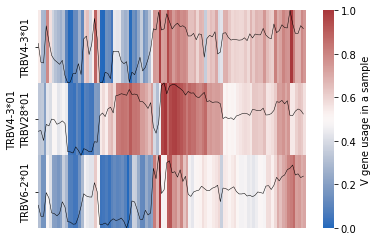

In [55]:
log_exp_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])